In [1]:
import json
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree


In [2]:
with open(os.path.join("datasets", 'datasets_properties.json'), "r") as f:
    dataset_properties = json.load(f)  # Assume multiple datasets are in this format
    
models = ['e_gcn', 'e_graph_sage']
# models = ['e_gcn', 'e_gat']
# models = ['e_graph_sage', 'e_gat]

properties = []
for name, data in dataset_properties.items():
    dataset = data['dataset_properties']
    graph_properties = data['graph_properties']

    properties.append({
        'Dataset': name,
        'Multi-class Gini': dataset['Multi-class Gini Coefficient'],
        'Binary Gini': dataset['Binary Classification Gini Coefficient'],
        'max_degree': graph_properties['max_degree'],
        'avg_degree': graph_properties['avg_degree'],
        'density': graph_properties['density'],
        # 'degree_skewness': graph_properties['degree_skewness'],
        'degree_alpha': graph_properties['degree_alpha'],
        # 'degree_relative_entropy': graph_properties['degree_relative_entropy'],
        # 'degree_scale_free': graph_properties['degree_scale_free'],
        'pagerank_skewness': graph_properties['pagerank_skewness'],
        'pagerank_relative_entropy': graph_properties['pagerank_relative_entropy'],
        'pagerank_alpha': graph_properties['pagerank_alpha'],
        'pagerank_scale_free': graph_properties['pagerank_scale_free'],
        # 'betweenness_skewness': graph_properties['betweenness_skewness'],
        # 'betweenness_relative_entropy': graph_properties['betweenness_relative_entropy'],
        # 'betweenness_alpha': graph_properties['betweenness_alpha'],
        # 'betweenness_scale_free': graph_properties['betweenness_scale_free'],
        # 'k_truss_skewness': graph_properties['k_truss_skewness'],
        # 'k_truss_relative_entropy': graph_properties['k_truss_relative_entropy'],
        # 'k_truss_alpha': graph_properties['k_truss_alpha'],
        # 'k_truss_scale_free': graph_properties['k_truss_scale_free'],
        'intersection between attacks and victims': graph_properties['intersection between attacks and victims'],
        'Proportion of Attackers': graph_properties['Proportion of Attackers'],
        'class_diversity_entropy': graph_properties['class_diversity_entropy'],
        'class_diversity_ratio': graph_properties['class_diversity_ratio'],
    })
# properties

In [3]:
properties_df = pd.DataFrame(properties)
properties_df

,Dataset,Multi-class Gini,Binary Gini,max_degree,avg_degree,density,degree_alpha,pagerank_skewness,pagerank_relative_entropy,pagerank_alpha,pagerank_scale_free,intersection between attacks and victims,Proportion of Attackers,class_diversity_entropy,class_diversity_ratio
0,cic_ton_iot,0.751213,0.030134,2066788,75.006946,0.000263,1.539547,196.958338,0.010834,1.407399,0,5,0.000077,0.0001,0.5253
1,cic_ids_2017,0.878124,0.304976,983995,294.304773,0.007693,2.046122,61.295120,0.830852,2.193557,1,8,0.000523,0.0001,0.3379
2,cic_bot_iot,0.436253,0.493358,6536889,91343.659864,155.876553,1.654160,12.037411,0.532433,3.470760,0,8,0.027211,0.0329,0.5178
3,cic_ton_iot_modified,0.635358,0.072417,2066788,149.980623,0.001144,5.279120,240.246144,0.019362,1.375214,0,5,0.000122,0.0001,0.4130
4,ccd_inid_modified,0.419770,0.020460,25411,1246.582524,6.110699,1.337243,4.847845,0.703732,1.687602,0,32,0.475728,0.2622,0.4196
5,nf_uq_nids_modified,0.835980,0.201140,278276,27033.325153,83.436189,1.249088,2.010959,0.733947,5.033510,0,8,0.073620,0.1259,0.0525
6,edge_iiot,0.761388,0.206522,1751388,22.999191,0.000065,114.007111,253.225802,0.063423,227.410485,0,12886,0.776236,0.0001,0.9998
7,nf_cse_cic_ids2018,0.904128,0.413629,2056618,158.853789,0.000862,1.780424,177.789639,0.259530,1.915698,0,66,0.007862,0.0022,0.6175
8,nf_uq_nids,0.884595,0.286718,2056618,229.142805,0.001223,1.770360,179.219768,0.268201,1.913730,0,81,0.007998,0.0025,0.6170
9,x_iiot,0.683325,0.014091,294296,11282.392857,50.821589,1.263443,3.549047,0.814292,2.212470,1,3,0.080357,0.0387,0.2089


In [4]:
for feature in properties_df.columns:
    if feature != "Dataset":
        print(f"==>> feature: {feature}")
        # Sort the DataFrame by the current feature in ascending order and print the "Dataset" column along with the current feature.
        sorted_df = properties_df.sort_values(by=feature, ascending=True)
        print(sorted_df[["Dataset", feature]])


==>> feature: Multi-class Gini
                Dataset  Multi-class Gini
4     ccd_inid_modified          0.419770
2           cic_bot_iot          0.436253
3  cic_ton_iot_modified          0.635358
9                x_iiot          0.683325
0           cic_ton_iot          0.751213
6             edge_iiot          0.761388
5   nf_uq_nids_modified          0.835980
1          cic_ids_2017          0.878124
8            nf_uq_nids          0.884595
7    nf_cse_cic_ids2018          0.904128
==>> feature: Binary Gini
                Dataset  Binary Gini
9                x_iiot     0.014091
4     ccd_inid_modified     0.020460
0           cic_ton_iot     0.030134
3  cic_ton_iot_modified     0.072417
5   nf_uq_nids_modified     0.201140
6             edge_iiot     0.206522
8            nf_uq_nids     0.286718
1          cic_ids_2017     0.304976
7    nf_cse_cic_ids2018     0.413629
2           cic_bot_iot     0.493358
==>> feature: max_degree
                Dataset  max_degree
4     ccd_ini

In [5]:
f1_scores = pd.read_csv(os.path.join("results", 'f1_scores.csv'), usecols=['Dataset'] + models)
f1_scores

,Dataset,e_gcn,e_graph_sage
0,cic_ids_2017,98.1600,98.403
1,cic_ton_iot_modified,84.0500,84.400
2,ccd_inid_modified,82.4600,93.660
3,x_iiot,94.1210,93.410
4,edge_iiot,95.0609,96.980
5,cic_ton_iot,84.8310,82.850
6,nf_uq_nids,85.6200,84.270
7,nf_cse_cic_ids2018,94.6800,93.950
8,nf_uq_nids_modified,88.0100,90.980


In [6]:
f1_scores['Dataset'] = f1_scores['Dataset'].str.strip().str.lower()
properties_df['Dataset'] = properties_df['Dataset'].str.strip().str.lower()

merged_df = pd.merge(properties_df, f1_scores, on='Dataset')
merged_df

,Dataset,Multi-class Gini,Binary Gini,max_degree,avg_degree,density,degree_alpha,pagerank_skewness,pagerank_relative_entropy,pagerank_alpha,pagerank_scale_free,intersection between attacks and victims,Proportion of Attackers,class_diversity_entropy,class_diversity_ratio,e_gcn,e_graph_sage
0,cic_ton_iot,0.751213,0.030134,2066788,75.006946,0.000263,1.539547,196.958338,0.010834,1.407399,0,5,0.000077,0.0001,0.5253,84.8310,82.850
1,cic_ids_2017,0.878124,0.304976,983995,294.304773,0.007693,2.046122,61.295120,0.830852,2.193557,1,8,0.000523,0.0001,0.3379,98.1600,98.403
2,cic_ton_iot_modified,0.635358,0.072417,2066788,149.980623,0.001144,5.279120,240.246144,0.019362,1.375214,0,5,0.000122,0.0001,0.4130,84.0500,84.400
3,ccd_inid_modified,0.419770,0.020460,25411,1246.582524,6.110699,1.337243,4.847845,0.703732,1.687602,0,32,0.475728,0.2622,0.4196,82.4600,93.660
4,nf_uq_nids_modified,0.835980,0.201140,278276,27033.325153,83.436189,1.249088,2.010959,0.733947,5.033510,0,8,0.073620,0.1259,0.0525,88.0100,90.980
5,edge_iiot,0.761388,0.206522,1751388,22.999191,0.000065,114.007111,253.225802,0.063423,227.410485,0,12886,0.776236,0.0001,0.9998,95.0609,96.980
6,nf_cse_cic_ids2018,0.904128,0.413629,2056618,158.853789,0.000862,1.780424,177.789639,0.259530,1.915698,0,66,0.007862,0.0022,0.6175,94.6800,93.950
7,nf_uq_nids,0.884595,0.286718,2056618,229.142805,0.001223,1.770360,179.219768,0.268201,1.913730,0,81,0.007998,0.0025,0.6170,85.6200,84.270
8,x_iiot,0.683325,0.014091,294296,11282.392857,50.821589,1.263443,3.549047,0.814292,2.212470,1,3,0.080357,0.0387,0.2089,94.1210,93.410


In [7]:
merged_df.columns

Index(['Dataset', 'Multi-class Gini', 'Binary Gini', 'max_degree',
       'avg_degree', 'density', 'degree_alpha', 'pagerank_skewness',
       'pagerank_relative_entropy', 'pagerank_alpha', 'pagerank_scale_free',
       'intersection between attacks and victims', 'Proportion of Attackers',
       'class_diversity_entropy', 'class_diversity_ratio', 'e_gcn',
       'e_graph_sage'],
      dtype='object')

## Random Forest

To check for each model alone

In [8]:


def compute_feature_importance(merged_df, models, target_model):
    """
    Trains a Random Forest classifier on the full dataset to compute feature importance 
    for predicting when the given target model performs best.

    Args:
        merged_df (pd.DataFrame): The DataFrame containing model scores and features.
        models (list): List of model names in the DataFrame.
        target_model (str): The model for which feature importance is computed.

    Returns:
        pd.DataFrame: A DataFrame containing feature importance scores.
    """
    print(f"\n{'='*30}\nComputing feature importance for: {target_model}\n{'='*30}")

    # Define features (exclude model scores, dataset column, and other binary target columns)
    exclude_columns = models + ["Dataset"] + [f"{m}_better" for m in models]
    X = merged_df.drop(columns=exclude_columns)
    y = merged_df[f'{target_model}_better']

    # Train Random Forest Classifier on the full dataset (no train-test split)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X, y)

    # Compute feature importances
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': clf.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print(feature_importance)
    return feature_importance


In [9]:
feature_importance_results = {}

for model in models:
    merged_df[f'{model}_better'] = (merged_df[models].idxmax(axis=1) == model).astype(int)

for model in models:
    feature_importance_results[model] = compute_feature_importance(merged_df, models, model)



Computing feature importance for: e_gcn
                                     Feature  Importance
11                   Proportion of Attackers    0.110996
1                                Binary Gini    0.109493
5                               degree_alpha    0.103269
13                     class_diversity_ratio    0.087396
0                           Multi-class Gini    0.082325
7                  pagerank_relative_entropy    0.082318
10  intersection between attacks and victims    0.072671
6                          pagerank_skewness    0.070692
12                   class_diversity_entropy    0.067279
2                                 max_degree    0.058692
4                                    density    0.051194
8                             pagerank_alpha    0.049932
3                                 avg_degree    0.037416
9                        pagerank_scale_free    0.016327

Computing feature importance for: e_graph_sage
                                     Feature  Importance

## Correlation Matrix

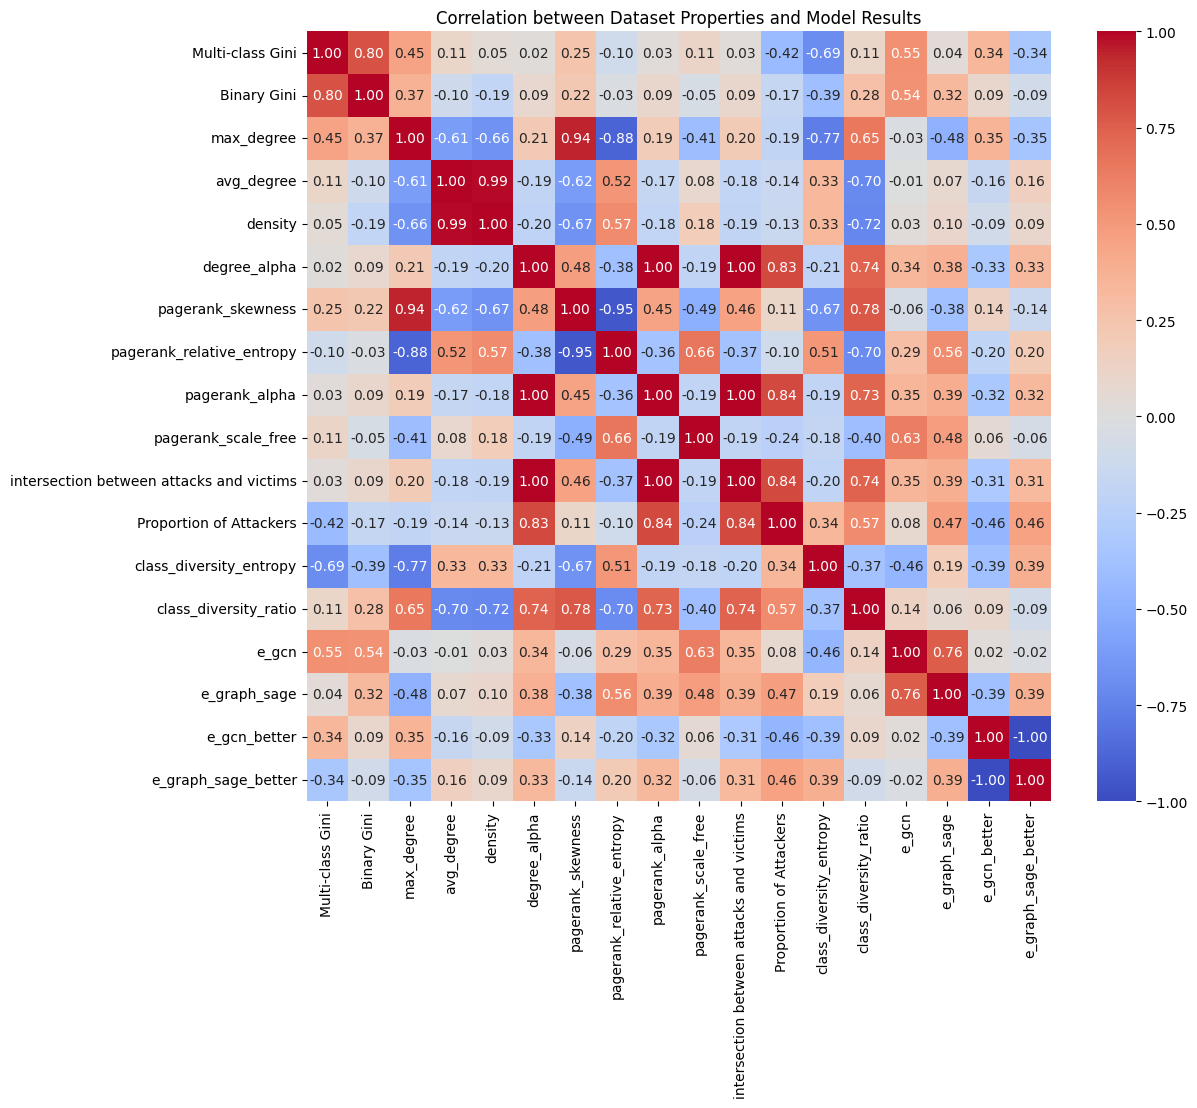

In [10]:
# Remove non-numeric columns for correlation calculation
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = merged_df[numeric_columns].corr()

# Step 5: Visualize correlations using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Dataset Properties and Model Results')
plt.show()

# Datasets Clustering

In [11]:
feature_columns = list(properties_df.columns.drop("Dataset"))


Datasets grouped into clusters:
                Dataset  Cluster
0           cic_ton_iot        1
1          cic_ids_2017        2
2  cic_ton_iot_modified        1
3     ccd_inid_modified        0
4   nf_uq_nids_modified        0
5             edge_iiot        1
6    nf_cse_cic_ids2018        1
7            nf_uq_nids        1
8                x_iiot        0


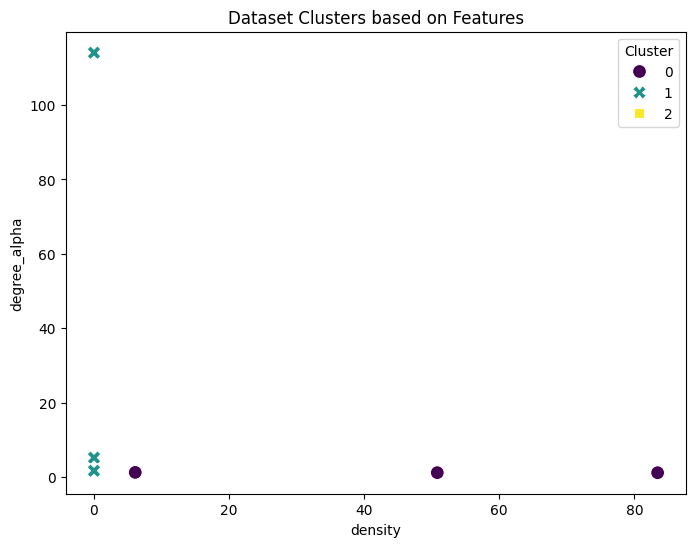

In [12]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
features = merged_df[feature_columns]
merged_df['Cluster'] = kmeans.fit_predict(features)

# Display datasets with their assigned clusters
print("\nDatasets grouped into clusters:")
print(merged_df[['Dataset', 'Cluster']])

# Step 6: Visualize the clusters (optional)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='density', 
    y='degree_alpha', 
    hue='Cluster', 
    data=merged_df, 
    palette='viridis', 
    style='Cluster', 
    s=100
)
plt.title('Dataset Clusters based on Features')
plt.xlabel('density')
plt.ylabel('degree_alpha')
plt.legend(title='Cluster')
plt.show()

merged_df = merged_df.drop(["Cluster"], axis=1)

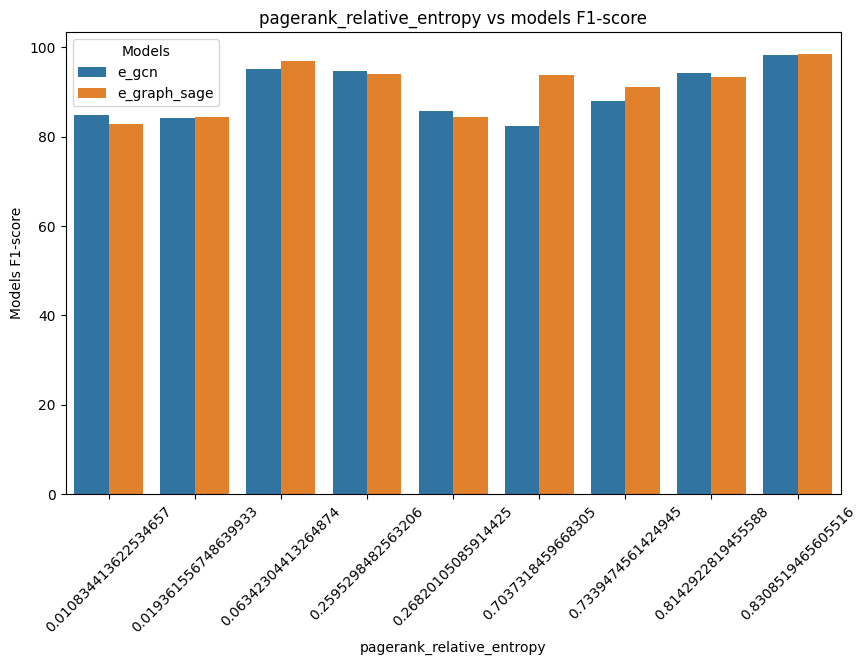

In [13]:
feature = "pagerank_relative_entropy"
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df[models + [feature]].melt(id_vars=[feature], var_name='model', value_name='F1-score'),
            x=feature, y='F1-score', hue='model')

plt.title(f'{feature} vs models F1-score')
plt.xlabel(feature)
plt.ylabel('Models F1-score')
plt.legend(title="Models")
plt.xticks(rotation=45)
plt.show()

# in case you want to visualize for each feautre


# for feature in feature_columns:
#     plt.figure(figsize=(10, 6))
#     # sns.barplot(data=merged_df[["e_gcn", "e_gat", feature]].melt(id_vars=[feature], var_name='model', value_name='F1-score'),
#     #             x=feature, y='F1-score', hue='model')
#     sns.barplot(data=merged_df[models + [feature]].melt(id_vars=[feature], var_name='model', value_name='F1-score'),
#                 x=feature, y='F1-score', hue='model')

#     plt.title(f'{feature} vs models F1-score')
#     plt.xlabel(feature)
#     plt.ylabel('Models F1-score')
#     plt.legend(title="Models")
#     plt.xticks(rotation=45)
#     plt.show()

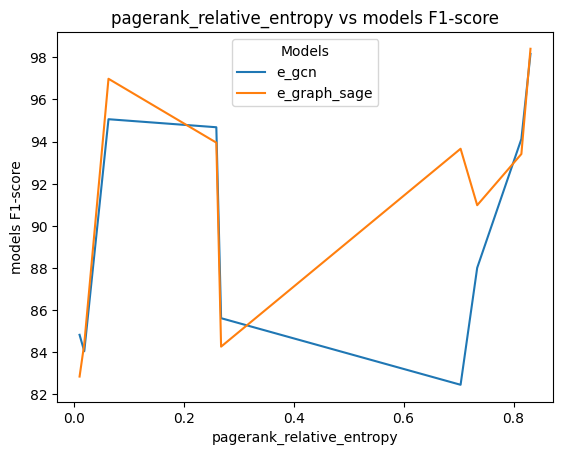

In [14]:
feature = "pagerank_relative_entropy"
for m in models:
    sns.lineplot(data=merged_df, x=feature, y=m, label=m)
plt.title(f'{feature} vs models F1-score')
plt.xlabel(feature)
plt.ylabel('models F1-score')
plt.legend(title="Models")
plt.show()
    
# in case you want to visualize for each feautre

# for feature in feature_columns:
#     for m in models:
#         sns.lineplot(data=merged_df, x=feature, y=m, label=m)
#     plt.title(f'{feature} vs models F1-score')
#     plt.xlabel(feature)
#     plt.ylabel('models F1-score')
#     plt.legend(title="Models")
#     plt.show()


## Highest Score

In [15]:
merged_df['score_max'] = merged_df[models].max(axis=1)

In [16]:
for model in models:
    print(f"==>> model: {model}")
    better_cases = merged_df['score_max'] == merged_df[model]
    print(f"\nCases where {model} performs better:")
    print(merged_df[better_cases][['Dataset'] + models])

==>> model: e_gcn

Cases where e_gcn performs better:
              Dataset   e_gcn  e_graph_sage
0         cic_ton_iot  84.831         82.85
6  nf_cse_cic_ids2018  94.680         93.95
7          nf_uq_nids  85.620         84.27
8              x_iiot  94.121         93.41
==>> model: e_graph_sage

Cases where e_graph_sage performs better:
                Dataset    e_gcn  e_graph_sage
1          cic_ids_2017  98.1600        98.403
2  cic_ton_iot_modified  84.0500        84.400
3     ccd_inid_modified  82.4600        93.660
4   nf_uq_nids_modified  88.0100        90.980
5             edge_iiot  95.0609        96.980


## Decision Tree

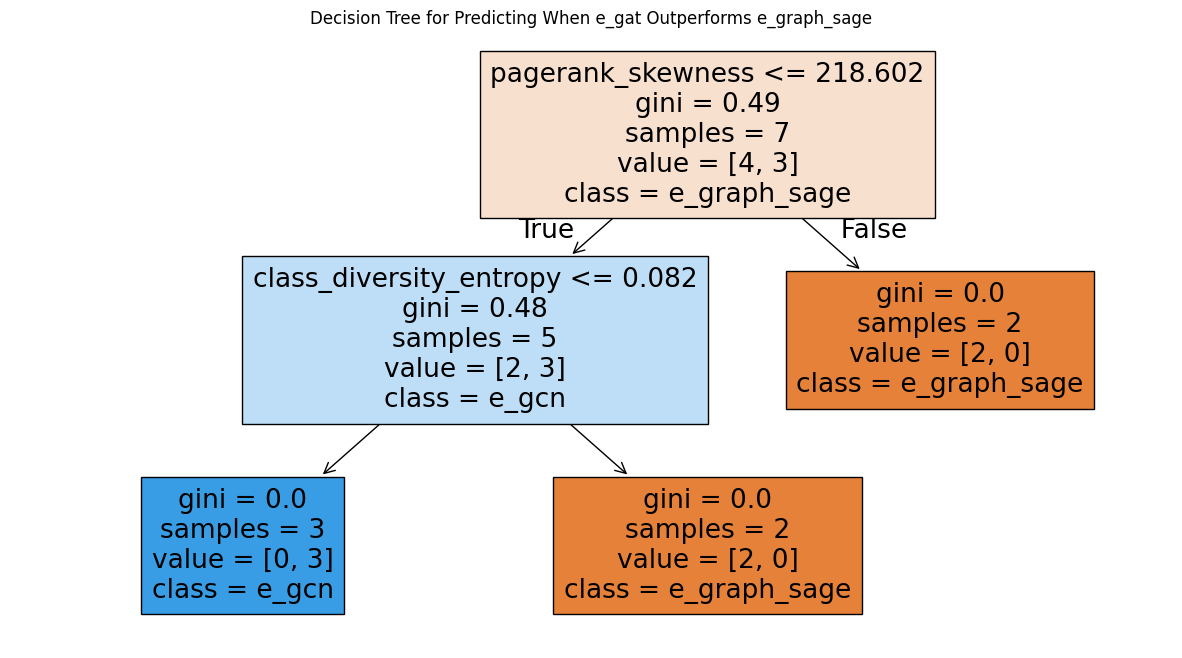

|--- pagerank_skewness <= 218.60
|   |--- class_diversity_entropy <= 0.08
|   |   |--- class: 1
|   |--- class_diversity_entropy >  0.08
|   |   |--- class: 0
|--- pagerank_skewness >  218.60
|   |--- class: 0



In [17]:
merged_df['target'] = (merged_df[models[0]] > merged_df[models[1]]).astype(int)

X = merged_df[feature_columns]
y = merged_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(X_train, y_train)

plt.figure(figsize=(15, 8))
plot_tree(dtc, feature_names=feature_columns, class_names=[models[1], models[0]], filled=True)
plt.title("Decision Tree for Predicting When e_gat Outperforms e_graph_sage")
plt.show()

tree_rules = export_text(dtc, feature_names=feature_columns)
print(tree_rules)
